# PRML Assignment 8

@uthor :- Darshil Patel(202011034)

In [ ]:
#useful librarys for this assigment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# load data matrix
import mat73
data_dict = mat73.loadmat('/content/drive/MyDrive/PRML_LAB/Assignment_8/faceimages.mat')

In [ ]:
# useful data

data = data_dict['data']
height = int(data_dict['height'])
width = int(data_dict['width'])
x_data = data[:,:-1]
# y_data = data[:,-1]
n = x_data.shape[0]
fields = x_data.shape[1]

In [ ]:
# to display image from vactor

def show_image(img_vac):

    # normalize 0 - 255
    temp_img = img_vac - np.min(img_vac)
    temp_img = np.array(255*(temp_img/np.max(temp_img)),dtype = 'int8')

    # reshape
    img = img_vac.reshape(width,height).T
    
    # show image
    plt.imshow(img,cmap = 'gray')
    plt.show()

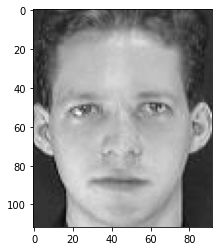

In [ ]:
# image from the data set
show_image(x_data[0,:])

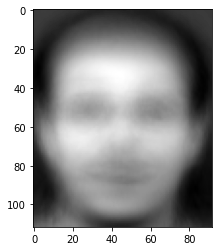

In [ ]:
# mean image
# mean_x = np.sum(x_data,axis=0)/n
mean_x = np.mean(x_data,axis=0)
show_image(mean_x)

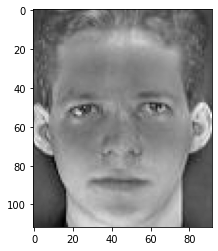

In [ ]:
# make Mean-center the data
# x_data = x_data - np.ones((400,1))@(mean_x.reshape((1,10304)))
x_data = x_data - mean_x
show_image(x_data[0,:])

In [ ]:
# covariance matrix of Mean-center data matrix
# cov_mat = ((x_data.T)@(x_data))/(n-1)
cov_mat = np.cov(x_data.T)

In [ ]:
# eigenvalue eigenvector decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals = np.real(eig_vals)
eig_vecs = np.real(eig_vecs)

In [ ]:
# sort eigenvectors using eigenvalues

eig_pairs = [eig_vals[i], eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0],end = '  ')

Eigenvalues in descending order:
2824722.1042665383  2070704.9702651834  1097410.8999068874  894862.4861588201  819932.9833921453  539165.2058805863  392479.6664043953  373909.7086386838  314984.20304060326  289296.71640923416  230854.48550211766  224271.83954879869  179487.85194608205  171210.04681597586  156451.2834484914  146599.7812828791  140553.27953047046  135608.54146483436  117955.92889291428  111621.06113016511  107737.3325939405  102438.47527707124  95161.85670586849  87276.17284777564  84940.34199866423  79215.51958151504  77267.90581871905  76833.17392145586  71891.66166033766  70023.1398887476  68875.55847368356  64041.17891809027  63355.47036844528  60995.47017606571  59245.60809145094  56234.4858809796  54570.88804772525  53977.92514805633  50896.40092631809  48147.949463814606  47382.159188970036  46672.3019277007  45219.43270055691  44523.85550801062  42980.93018441689  41480.51414575567  40833.010406396446  39909.808123674746  39326.015980909695  38476.61731452633  3

# Energy Graph

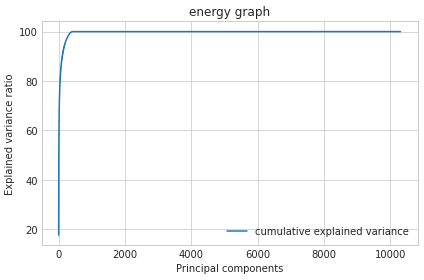

In [ ]:
# energy graph
# total varience
tot = sum(eig_vals)

# varience capture by each eigenvector
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

# comulative sum of varience
cum_var_exp = np.cumsum(var_exp) 

# ploat diagram of comulative
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.step(range(fields), cum_var_exp, where='mid',
            label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.title('energy graph')
    plt.legend(loc='best')
    plt.tight_layout()

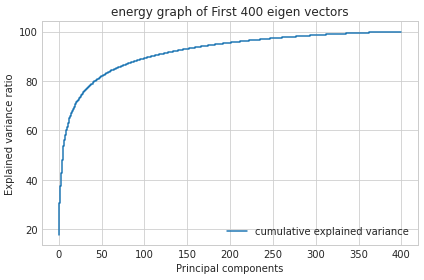

In [ ]:
# energy graph of first 400 eigenvectors
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.step(range(400), cum_var_exp[:400], where='mid',
            label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.title('energy graph of First 400 eigen vectors')
    plt.legend(loc='best')
    plt.tight_layout()

## My PCA implementation

In [ ]:
# get projected image(in low dimention image),reconstructed image and reconstruction error 
def get_reconstructed_image(x_data,eig_pairs,k):
    # select first k eigen vector
    k_eig_vec = [eig_pairs[i][1].reshape(fields,1) for i in range(k)]

    # projection matrix
    new_axes = np.hstack(k_eig_vec)

    # new projected data
    X_proj = x_data.dot(new_axes)

    # reconstructed image
    X_proj_return = X_proj@(new_axes.T)

    # reconstruction error
    error = np.linalg.norm(x_data-X_proj_return)
    # error in percentage
    error_pr = (error * 100)/(np.linalg.norm(x_data))
    return X_proj,X_proj_return,error_pr

size of data metrix :- (400, 5)
Reconstruction Error(in %) :- 72.07459337213095




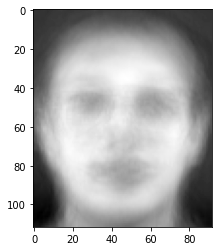

In [ ]:
# number of dimention = 5
X_proj5,X_proj_return,error_pr = get_reconstructed_image(x_data,eig_pairs,5)
print("size of data metrix :-",X_proj5.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

size of data metrix :- (400, 10)
Reconstruction Error(in %) :- 63.27778188042152




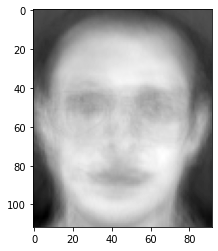

In [ ]:
# number of dimention = 10
X_proj10,X_proj_return,error_pr = get_reconstructed_image(x_data,eig_pairs,10)
print("size of data metrix :-",X_proj10.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

size of data metrix :- (400, 50)
Reconstruction Error(in %) :- 42.87078818234059




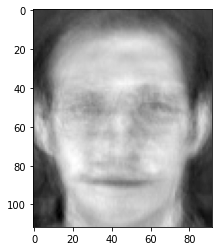

In [ ]:
# number of dimention = 50
X_proj50,X_proj_return,error_pr = get_reconstructed_image(x_data,eig_pairs,50)
print("size of data metrix :-",X_proj50.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

size of data metrix :- (400, 100)
Reconstruction Error(in %) :- 33.044950757099734




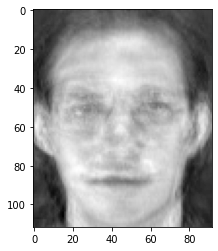

In [ ]:
# number of dimention = 100
X_proj100,X_proj_return,error_pr = get_reconstructed_image(x_data,eig_pairs,100)
print("size of data metrix :-",X_proj100.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

size of data metrix :- (400, 400)
Reconstruction Error(in %) :- 4.772922601660333e-12




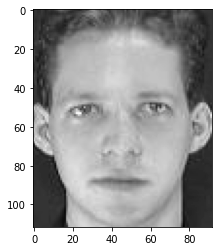

In [ ]:
# number of dimention = 400
X_proj400,X_proj_return,error_pr = get_reconstructed_image(x_data,eig_pairs,400)
print("size of data metrix :-",X_proj400.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

## sklearn's PCA implementation

In [ ]:
from sklearn.decomposition import PCA
def sk_PCA(x_data,k):
    pca = PCA(n_components=k)

    # new projected data
    X_proj = pca.fit_transform(x_data)

    # reconstructed image
    X_proj_return = pca.inverse_transform(X_proj)
    
    # reconstruction error
    error = np.linalg.norm(x_data-X_proj_return)
    # error in percentage
    error_pr = (error * 100)/(np.linalg.norm(x_data))
    return X_proj,X_proj_return,error_pr

size of data metrix :- (400, 5)
Reconstruction Error(in %) :- 72.0745933721578




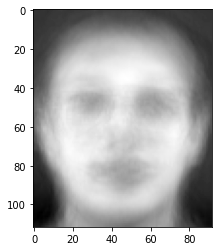

In [ ]:
# number of dimention = 5
sk_X_proj5,X_proj_return,error_pr = sk_PCA(x_data ,5)
print("size of data metrix :-",sk_X_proj5.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

size of data metrix :- (400, 10)
Reconstruction Error(in %) :- 63.27778267773598




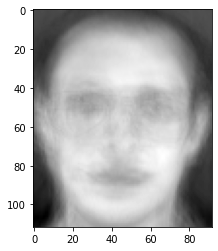

In [ ]:
# number of dimention = 10
sk_X_proj,X_proj_return,error_pr = sk_PCA(x_data ,10)
print("size of data metrix :-",sk_X_proj.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

size of data metrix :- (400, 50)
Reconstruction Error(in %) :- 42.93388737921471




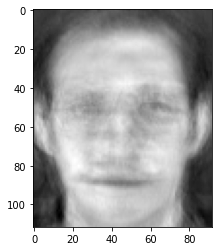

In [ ]:
# number of dimention = 50
sk_X_proj,X_proj_return,error_pr = sk_PCA(x_data ,50)
print("size of data metrix :-",sk_X_proj.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

size of data metrix :- (400, 100)
Reconstruction Error(in %) :- 33.15725192066427




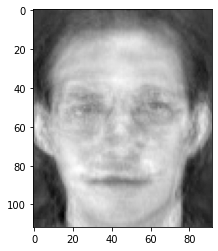

In [ ]:
# number of dimention = 100
sk_X_proj,X_proj_return,error_pr = sk_PCA(x_data ,100)
print("size of data metrix :-",sk_X_proj.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)

size of data metrix :- (400, 400)
Reconstruction Error(in %) :- 3.2123713646490157e-13




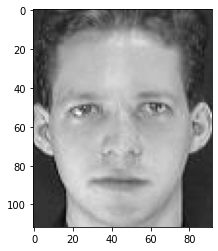

In [ ]:
# number of dimention = 400
sk_X_proj,X_proj_return,error_pr = sk_PCA(x_data ,400)
print("size of data metrix :-",sk_X_proj.shape) 
print("Reconstruction Error(in %) :-",error_pr)
print('\n')
show_image(X_proj_return[0,:] + mean_x)